In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# Importing everything that is necessary!

In [2]:
train=pd.read_csv(r'C:\Users\91766\Music\amazon_review_full_csv\amazon_review_full_csv\train.csv', names=['rating', 'title', 'review'], header= None)
test=pd.read_csv(r'C:\Users\91766\Music\amazon_review_full_csv\amazon_review_full_csv\test.csv', names=['rating', 'title', 'review'], header= None)
# Reading the data

In [3]:
train.describe(include='all')

,rating,title,review
count,3.000000e+06,2999924,3000000
unique,NaN,2250759,2997086
top,NaN,Disappointed,"For some inexplicable reason, Amazon has remov..."
freq,NaN,8164,27
mean,3.000000e+00,NaN,NaN
std,1.414214e+00,NaN,NaN
min,1.000000e+00,NaN,NaN
25%,2.000000e+00,NaN,NaN
50%,3.000000e+00,NaN,NaN
75%,4.000000e+00,NaN,NaN


In [4]:
test.describe(include='all')

,rating,title,review
count,650000.000000,649988,650000
unique,NaN,528170,649850
top,NaN,Disappointed,"Bought a cell phone battery that, of course, d..."
freq,NaN,1848,4
mean,3.000000,NaN,NaN
std,1.414215,NaN,NaN
min,1.000000,NaN,NaN
25%,2.000000,NaN,NaN
50%,3.000000,NaN,NaN
75%,4.000000,NaN,NaN


In [5]:
# The datasets are quite large and we will use only a small subset of the entire data for our purposes to save time!
# We will apply Easy Data Augmentation techniques, the benefits of which are most visible for smaller datasets, and we won't be
# using any pretrained models.

In [6]:
train_1=train.iloc[:105000, :] # Training
test_1=test.iloc[:20000, :]    # Validation
test_final=test.iloc[20001:40000, :] # Testing
train_1['rating']=train_1['rating'] -1
test_1['rating']=test_1['rating'] -1
test_final['rating']=test_final['rating'] -1
# We will use the softmax activation function in the end for multi class classification, which for a range of 1 to 5 will 
# be considering 0 as well, which will make us have to specify the number of labels as 6. In order to avoid this, we change the 
# rating range to 0-4 from 1-5, so we can specify the number of labels as 5, and softmax can work appropriately!

<ipython-input-6-fbde65eb6da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['rating']=train_1['rating'] -1
<ipython-input-6-fbde65eb6da9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1['rating']=test_1['rating'] -1
<ipython-input-6-fbde65eb6da9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [7]:
print(train_1.head())

   rating                                  title                                             review
0       2                     more like funchuck  Gave this to my dad for a gag gift after direc...
1       4                              Inspiring  I hope a lot of people hear this cd. We need m...
2       4  The best soundtrack ever to anything.  I'm reading a lot of reviews saying that this ...
3       3                       Chrono Cross OST  The music of Yasunori Misuda is without questi...
4       4                    Too good to be true  Probably the greatest soundtrack in history! U...


In [8]:
print(test_1.head())

   rating                         title                                             review
0       0               mens ultrasheer  This model may be ok for sedentary types, but ...
1       3       Surprisingly delightful  This is a fast read filled with unexpected hum...
2       1  Works, but not as advertised  I bought one of these chargers..the instructio...
3       1                       Oh dear  I was excited to find a book ostensibly about ...
4       1               Incorrect disc!  I am a big JVC fan, but I do not like this mod...


In [9]:
print(test_final.head())

       rating                                       title                                             review
20001       4  An excellent record of what it was like...  It is very well written, and has a lot of deta...
20002       3                      Good but not objective  This book contains a lot of good information a...
20003       4                       Texacana at it's best  Great book on the Texas Rangers. The book is e...
20004       2                            Consider this...  This has some boom for its size, NOT crisp how...
20005       1                                  Submarines  While this film looks and sounds very much lik...


In [10]:
train_1.isnull().sum()
# We won't be using the titles as a feature, and no reviews or ratings are missing!

rating    0
title     2
review    0
dtype: int64

In [11]:
train_1['rating'].value_counts()

2    21611
4    21170
1    21072
3    21012
0    20135
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

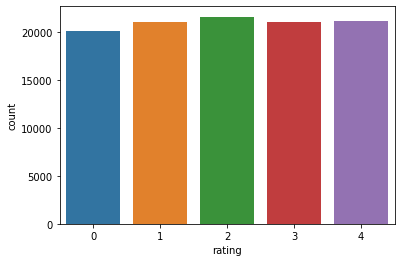

In [12]:
sns.countplot(x='rating', data=train_1)
# A visualisation of the fact that there is no major imbalance among the 5 different labels in the training set!

In [13]:
#Performing preprocessing
import re
import string
train_1['review']=train_1['review'].apply(lambda x: x.lower())
train_1['review']=train_1['review'].apply(lambda x: re.sub('\w*\d\w*','', x))
train_1['review']=train_1['review'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
train_1['review']=train_1['review'].apply(lambda x: re.sub(' +',' ',x))
test_1['review']=test_1['review'].apply(lambda x: x.lower())
test_1['review']=test_1['review'].apply(lambda x: re.sub('\w*\d\w*','', x))
test_1['review']=test_1['review'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
test_1['review']=test_1['review'].apply(lambda x: re.sub(' +',' ',x))
# We have lowercased all characters, removed extra spaces, removed words with digits, and removed punctuations!


<ipython-input-13-a5d3f2b2506d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['review']=train_1['review'].apply(lambda x: x.lower())
<ipython-input-13-a5d3f2b2506d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['review']=train_1['review'].apply(lambda x: re.sub('\w*\d\w*','', x))
<ipython-input-13-a5d3f2b2506d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [14]:
train_1.head()

,rating,title,review
0,2,more like funchuck,gave this to my dad for a gag gift after direc...
1,4,Inspiring,i hope a lot of people hear this cd we need mo...
2,4,The best soundtrack ever to anything.,im reading a lot of reviews saying that this i...
3,3,Chrono Cross OST,the music of yasunori misuda is without questi...
4,4,Too good to be true,probably the greatest soundtrack in history us...


In [15]:
test_1.head()

,rating,title,review
0,0,mens ultrasheer,this model may be ok for sedentary types but i...
1,3,Surprisingly delightful,this is a fast read filled with unexpected hum...
2,1,"Works, but not as advertised",i bought one of these chargersthe instructions...
3,1,Oh dear,i was excited to find a book ostensibly about ...
4,1,Incorrect disc!,i am a big jvc fan but i do not like this mode...


In [16]:
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91766\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91766\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91766\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
# Returns a sentence without stopwords, and helps us clean our data!
def stop_removal(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    return filtered_sentence

In [18]:
t0 = []
for review in list(train_1['review']):
    t0.append(stop_removal(review))
train_1['review'] = t0
t = []
for review in list(test_1['review']):
    t.append(stop_removal(review))
test_1['review'] = t

<ipython-input-18-0a441fc9f8a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['review'] = t0
<ipython-input-18-0a441fc9f8a9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1['review'] = t


In [19]:
train_1.head()

,rating,title,review
0,2,more like funchuck,gave dad gag gift directing nunsense got reall...
1,4,Inspiring,hope lot people hear cd need strong positive v...
2,4,The best soundtrack ever to anything.,im reading lot reviews saying best game soundt...
3,3,Chrono Cross OST,music yasunori misuda without question close s...
4,4,Too good to be true,probably greatest soundtrack history usually b...


In [20]:
test_1.head()

,rating,title,review
0,0,mens ultrasheer,model may ok sedentary types im active get aro...
1,3,Surprisingly delightful,fast read filled unexpected humour profound in...
2,1,"Works, but not as advertised",bought one chargersthe instructions say lights...
3,1,Oh dear,excited find book ostensibly muslim feminism v...
4,1,Incorrect disc!,big jvc fan like model suspiscious saw several...


In [21]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91766\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
# We can use stemming as it is faster, but we'll take the extra time to lemmatize our reviews using POS tagging as well, and 
# clean our data further by converting words to their root forms with context!

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lem_rev(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [23]:
g0 = []
for review in list(train_1['review']):
    g0.append(lem_rev(review))
train_1['review'] = g0
g = []
for review in list(test_1['review']):
    g.append(lem_rev(review))
test_1['review'] = g

<ipython-input-23-8156536b5369>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['review'] = g0
<ipython-input-23-8156536b5369>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1['review'] = g


In [24]:
train_1.head()

,rating,title,review
0,2,more like funchuck,give dad gag gift direct nunsense get reall kick
1,4,Inspiring,hope lot people hear cd need strong positive v...
2,4,The best soundtrack ever to anything.,im reading lot review say best game soundtrack...
3,3,Chrono Cross OST,music yasunori misuda without question close s...
4,4,Too good to be true,probably great soundtrack history usually well...


In [25]:
test_1.head()

,rating,title,review
0,0,mens ultrasheer,model may ok sedentary type im active get arou...
1,3,Surprisingly delightful,fast read fill unexpected humour profound insi...
2,1,"Works, but not as advertised",buy one chargersthe instruction say light stay...
3,1,Oh dear,excite find book ostensibly muslim feminism vo...
4,1,Incorrect disc!,big jvc fan like model suspiscious saw several...


In [26]:
# We begin applying Easy Data Augmentation here, and we only have to augment the training set, as opposed to previous situations
# where we had to preprocess the validation set as well!
def random_deletion(words, p):

    words2 = words.split()
    
    #obviously, if there's only one word, don't delete it
    if len(words2) == 1:
        return words2[0]

    #randomly delete words with probability p
    new_words = []
    for word in words2:
        r = random.uniform(0, 1)
        if r > p:
            new_words.append(word)

    #if you end up deleting all words, just return a random word
    if len(new_words) == 0:
        rand_int = random.randint(0, len(words)-1)
        return string(words2[rand_int])

    sentence = ' '.join(new_words)
    
    return sentence

In [27]:
t1 = []
for review in list(train_1['review']):
    t1.append(random_deletion(review, 0.15))
train_1['review'] = t1

<ipython-input-27-5b34b2f61219>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['review'] = t1


In [28]:
train_1.head()

,rating,title,review
0,2,more like funchuck,give dad gag gift direct nunsense get reall kick
1,4,Inspiring,hope lot people hear cd need strong positive v...
2,4,The best soundtrack ever to anything.,im reading lot review say best game soundtrack...
3,3,Chrono Cross OST,music yasunori misuda question second great no...
4,4,Too good to be true,great soundtrack history well play game first ...


In [29]:
# Get synonyms of a word
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonym = l.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym) 
    
    if word in synonyms:
        synonyms.remove(word)
    
    return list(synonyms)

In [30]:
# Replace upto n words in a review with any synonym
def synonym_replacement(words1, n):
    words1 = words1.split()
    new_words = words1.copy()
    random_word_list = list(set([word for word in words1 if word not in stop_words]))
    random.shuffle(random_word_list)
    num_replaced = 0
    
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        
        if len(synonyms) >= 1:
            synonym = random.choice(list(synonyms))
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        
        if num_replaced >= n: #only replace up to n words
            break

    sentence = ' '.join(new_words)

    return sentence

In [31]:
t2 = []
for review in list(train_1['review']):
    t2.append(synonym_replacement(review, 4))

In [32]:
train_1['review'] = t2

<ipython-input-32-13159ed72374>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['review'] = t2


In [33]:
# Randomly Swapping words in a review!
def swap_word(new_words):
    
    random_idx_1 = random.randint(0, len(new_words)-1)
    random_idx_2 = random_idx_1
    counter = 0
    
    while random_idx_2 == random_idx_1:
        random_idx_2 = random.randint(0, len(new_words)-1)
        counter += 1
        
        if counter > 3:
            return new_words
    
    new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1] 
    return new_words

def random_swap(words, n):
    
    words = words.split()
    new_words = words.copy()
    
    for _ in range(n):
        new_words = swap_word(new_words)
        
    sentence = ' '.join(new_words)
    
    return sentence

In [34]:
t3 = []
for review in list(train_1['review']):
    t3.append(random_swap(review, 3))
train_1['review'] = t3

<ipython-input-34-dd2d0558a449>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['review'] = t3


In [35]:
# Add synonyms of some words in a review
def random_insertion(words, n):
    
    words = words.split()
    new_words = words.copy()
    
    for _ in range(n):
        add_word(new_words)
        
    sentence = ' '.join(new_words)
    return sentence

def add_word(new_words):
    
    synonyms = []
    counter = 0
    
    while len(synonyms) < 1:
        random_word = new_words[random.randint(0, len(new_words)-1)]
        synonyms = get_synonyms(random_word)
        counter += 1
        if counter >= 10:
            return
        
    random_synonym = synonyms[0]
    random_idx = random.randint(0, len(new_words)-1)
    new_words.insert(random_idx, random_synonym)

In [36]:
t4 = []
for review in list(train_1['review']):
    t4.append(random_insertion(review, 2))
train_1['review'] = t4

<ipython-input-36-8ef8b76080e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['review'] = t4


In [37]:
train_1.head()
# The final training dataset with preprocessed and augmented reviews

,rating,title,review
0,2,more like funchuck,grant produce gag kvetch gift place pappa pop ...
1,4,Inspiring,people lot hope getting cd need strong positiv...
2,4,The best soundtrack ever to anything.,im reading lot review say best gritty soundtra...
3,3,Chrono Cross OST,music yasunori misuda question second great no...
4,4,Too good to be true,peachy soundtrack work well play game first en...


In [38]:
train_feature=np.array(train_1['review'].values.tolist())
train_label=np.array(train_1['rating'].values.tolist())
test_feature=np.array(test_1['review'].values.tolist())
test_label=np.array(test_1['rating'].values.tolist())
test_final_feature=np.array(test_final['review'].values.tolist())
test_final_label=np.array(test_final['rating'].values.tolist())

In [39]:
from keras_preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_feature)
word_index=tokenizer.word_index
vocab_size = len(word_index)+1
print(vocab_size)

155101


In [40]:
train_feature = tokenizer.texts_to_sequences(train_feature)
test_feature = tokenizer.texts_to_sequences(test_feature)
test_final_feature = tokenizer.texts_to_sequences(test_final_feature)
# We tokenize all of our reviews, because that is required as input to a keras model!

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
maxlen = 100
train_feature_pad = pad_sequences(train_feature, padding='post', maxlen=maxlen)
test_feature_pad = pad_sequences(test_feature, padding='post', maxlen=maxlen)
test_final_feature_pad = pad_sequences(test_final_feature, padding='post', maxlen=maxlen)
# Reviews with length greater than 100 are cut off at 100, while reviews with length less than 100 are padded with zeros till 
# a length of 100 is obtained!

In [42]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional
# Building the model containing an Embedding and a Birdirectional LSTM Layer
from tensorflow.keras.models import Sequential
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 32, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [43]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           4963232   
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 4,982,117
Trainable params: 4,982,117
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
num_epochs = 2
batch = 64
history = model.fit(train_feature_pad, train_label, shuffle=True, batch_size=batch, epochs=num_epochs, validation_data=(test_feature_pad, test_label), verbose=2)
# We don't need more epochs as I found that results in overfitting, and the model doesn't do better than 46% accuracy. A bit of 
# hyperparameter tuning may push the accuracy (validation) upto 47%.
# The benchmark accuracy on this dataset is around 66% achieved by BERT (although that was achieved after training on the complete dataset!)

Epoch 1/2
1641/1641 - 174s - loss: 1.3664 - accuracy: 0.3893 - val_loss: 1.2486 - val_accuracy: 0.4503
Epoch 2/2
1641/1641 - 169s - loss: 1.1431 - accuracy: 0.5169 - val_loss: 1.2598 - val_accuracy: 0.4561


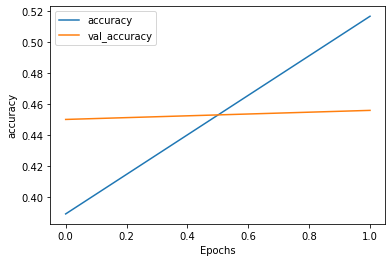

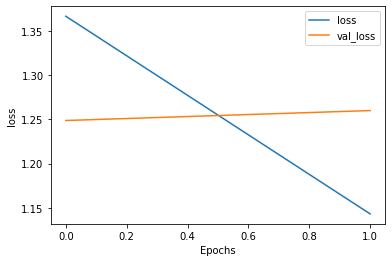

In [45]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
# There was a very slight increase in accuracy at the end of the second epoch, and even that coincided with a minor increase in 
# loss, so we don't need to train any further!

In [46]:
model.evaluate(test_final_feature_pad, test_final_label)
# The performance of the model is evaluated using a dataset where no preprocessing of the reviews has been done, and we'll 
# need some preprocessing of real world data to get similar accuracy to the validation set!

625/625 [==============================] - 6s 10ms/step - loss: 1.4959 - accuracy: 0.3883


[1.49586820602417, 0.38826942443847656]